# How to Perform Data Cleaning for Machine Learning with Python

Author: Jason Brownlee

Article from [machinelearningmastery](https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [40]:
from pandas import read_csv
from numpy import unique
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# Messy datasets

## Oil spill dataset

In [3]:
path_oil_spill = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
oil_spill_df = read_csv(path_oil_spill, header=None)

## Iris flowers dataset

In [5]:
path_iris_flowers = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
iris_flowers_df = read_csv(path_iris_flowers, header=None)

## Identify columns that contain a single value

### Summarize the number of unique values in each column

#### Using numpy

In [18]:
for i in oil_spill_df:
    print(i, len(unique(oil_spill_df[i].values)))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


#### Using pandas

In [19]:
print(oil_spill_df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## Delete columns that contain a single value

### Get number of unique values for each column

In [20]:
counts = oil_spill_df.nunique()

### Record columns to delete

In [23]:
to_del = [i for i, v in enumerate(counts) if v == 1]
print(to_del)

[22]


### Drop useless columns

In [24]:
oil_spill_df.drop(to_del, axis=1, inplace=True)
print(oil_spill_df.shape)

(937, 49)


## Consider columns that have very few values

### Summarize the number of unique values in each column

In [25]:
for i in oil_spill_df:
    num = len(unique(oil_spill_df[i].values))
    percentage = float(num) / oil_spill_df.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


### Summarize the number of unique values in each column, less than 1 percent

In [26]:
for i in oil_spill_df:
    num = len(unique(oil_spill_df[i].values))
    percentage = float(num) / oil_spill_df.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


### Get number of unique values for each column

In [27]:
counts = oil_spill_df.nunique()

### Record columns to delete

In [28]:
to_del = [i for i, v in enumerate(counts) if (float(v)/oil_spill_df.shape[0]*100) < 1]
print(to_del)

[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]


### Drop useless columns

In [29]:
oil_spill_df.drop(to_del, axis=1, inplace=True)
print(oil_spill_df.shape)

(937, 39)


## Remove columns that have a low variance

### Load the dataset

In [31]:
oil_spill_df = read_csv(path_oil_spill, header=None)

### Split data into inputs and outputs

In [33]:
data = oil_spill_df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(937, 49) (937,)


### Define the transform

In [34]:
transform = VarianceThreshold()

### Transform the input data

In [36]:
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 48)


### Define thresholds to check

In [38]:
thresholds = arange(0.0, 0.55, 0.05)

### Apply transform with each threshold

In [39]:
results = list()
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


### Plot the threshold vs the number of selected features

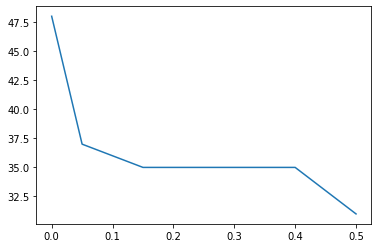

In [41]:
pyplot.plot(thresholds, results)
pyplot.show()

## Identify tows that contain duplicat data

### Calculate duplicates

In [42]:
dups = iris_flowers_df.duplicated()

### Report if there are any duplicates

In [43]:
print(dups.any())

True


### List all duplicate rows

In [44]:
print(iris_flowers_df[dups])

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


## Delete rows that contain duplicate data

### Delete duplicate rows

In [45]:
print(iris_flowers_df.shape)
iris_flowers_df.drop_duplicates(inplace=True)
print(iris_flowers_df.shape)

(150, 5)
(147, 5)
